## Аналитика в Яндекс.Афише

### Знакомство с данными


Посмтотрим внимательнее на данные о посещениях сайта.

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.duplicated().sum() # проверка на дубликаты 

0

В логах содержится информация о **359400** различных посещениях сайта. 

Категория устройства пользователя (Device), дата и время начала (Start Ts) и окончания (End Ts) сессии - признаки типа object. Необходимо преоразовать даты к типу datetime. Идентификатор рекламного источника, из которого пришел пользователь, (Source Id) - целочисленного типа. Уникальный идентификатор пользователя (Uid) - положительного целочисленного типа.


Посмотрим внимательнее на информацию о заказах.

In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.duplicated().sum() # проверка на дубликаты 

0

В данных **50415** различных заказа. 

Уникальный идентификатор пользователя (Uid), который сделал заказ, имеет положительный целочисленный тип uint64. Дата и время заказа (Buy Ts) - типа object. Необхоимо преобразовать дату и время заказа к datetime типу в pandas. Выручка Яндекс.Афиши (Revenue) — вещественного типа.

Посмотрим внимательнее на информацию о затратах на маркетинг.

In [9]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs.duplicated().sum() # проврека на дубликаты

0

В данных содержится информация о **2542** затратах на макретинг.

Дату (dt) необходимо преобразовать в тип datetime. Затраты на этот рекламный источник в этот день (costs) - вещесвтенного типа. Идентификатор рекламного источника, из которого пришел пользователь, (Source Id) - целочисленного типа.

### Выводы

Загрузили и познакомились с данными. В данных нет пропусков и дубликатов. Для всех таблиц необходимо привести дату в тип datetime. Приступим к предобработке данных.

<a name="preprocess"></a>
### Подготовка данных

Оптимизиурем данные для анализа. Во-первых, приведем названия столбцов таблиц visits и orders к нижнему регистру с подчёркиванием вместо пробела.

In [12]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

Приведём все даты к типу datetime.

In [13]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'] )
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

### Вывод 

- Названия столбцов были приведены к нижнему регистру с подчёркиванием вместо пробела. 

- Все признаки даты были преобразованы к типу datetime.


<a name="product"></a>
### Построение отчётов и подсчёт метрик для продукта 

*a) Вычислим сколько людей пользуются сервисом в день, неделю, месяц.*

Изучим пользовательскую активность. На активных пользователей смотрят в трёх измерениях: **DAU** (от англ. daily active users) — количество уникальных пользователей в день; **WAU** (от англ. weekly active users) — количество уникальных пользователей в неделю; **MAU** (от англ. monthly active users) — количество уникальных пользователей в месяц.

Добавим к таблице столбцы с годом, месяцем, неделей и днем посещения.

In [14]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [15]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [16]:
dau_total = visits.groupby(['session_date']).agg({'uid': 'nunique'}).mean()
print('DAU =', int(dau_total))
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('WAU =', int(wau_total))
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('MAU =', int(mau_total))

DAU = 907
WAU = 5716
MAU = 23228


Как правило, эти метрики растут и оттого нужны для мотивации команды. На английском их называют **vanity metrics** (англ. «метрики тщеславия»).

Ещё одна метрика — **sticky factor** (англ. «липкий фактор»). Формулы его расчёта простые: 

sticky factor = DAU/WAU или 

sticky factor = DAU/MAU. 

Так можно посчитать регулярность использования приложения — то, как часто пользователи к нему обращаются. «Sticky Factor» показывает, с какой вероятностью новый привлеченный пользователь останется в продукте, насколько хорошо продукт удерживает и «цепляет» пользователей.

Найдем sticky factor по отношению к месячной и недельной аудитории. 

In [17]:
sticky_wau = round(dau_total/wau_total * 100)
sticky_mau = round(dau_total/mau_total * 100)

In [18]:
print('sticky_wau =', str(sticky_wau.values).strip('[').strip(']').strip('.') + '%')
print('sticky_mau =', str(sticky_mau.values).strip('[').strip(']').strip('.') + '%')

sticky_wau = 16%
sticky_mau = 4%


In [19]:
16*7/100, 4*30/100

(1.12, 1.2)

sticky_mau = 4 - значит, что в среднем каждый пользователь **обращается к сервису Яндекс.Афиша чуть более раза в месяц.** Для бизнеса это показывает очень низкую степень вовлеченности и лояльности аудитории к продукту. Пользователи не задерживаются в приложении.

Возможно, это специфика услуги, люди составляют планы на поход в кино или посещение выставки в среднем чуть более раза в месяц. Это норма один раз в месяц октрыть сайт Яндекс.Афиши и составить свои долгожданные планы.

Однако также возможно, что сервис Яндекс.Афиша непопулярен среди пользователей. Важно проверить эффективность маркетинговой компании и интерфейс приложения - оценить, насколько ценен и актуален контент, насыщен ли сервис полезными инстурментами и фичами, как обрабатываются отзывы клиентов, оправляются ли напоминания о запланированных/новых/интересных событиях. И, во-вторых, исселдовать как работают конкуренты.

*Несмотря на то, что «Sticky Factor» напрямую не связан с доходом, он характеризует лояльность и активность аудитории, что в свою очередь влияет на монетизацию и доход, так чем стабильнее и заинтересованнее пользовательская база, тем быстрее формируется и растет аудитория продукта, а чем она больше, тем больше платежей совершают пользователи.*

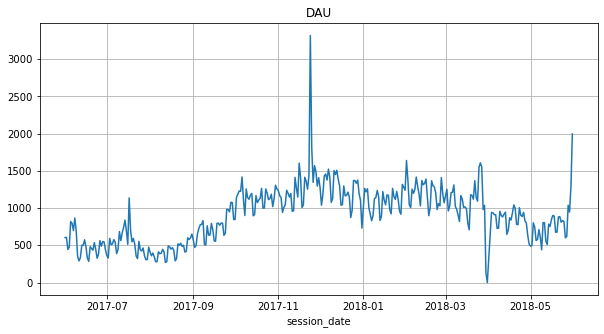

In [20]:
visits.groupby(['session_date']).agg({'uid': 'nunique'}).plot(grid=True, legend='',figsize=(10,5))
plt.title('DAU')
plt.show()

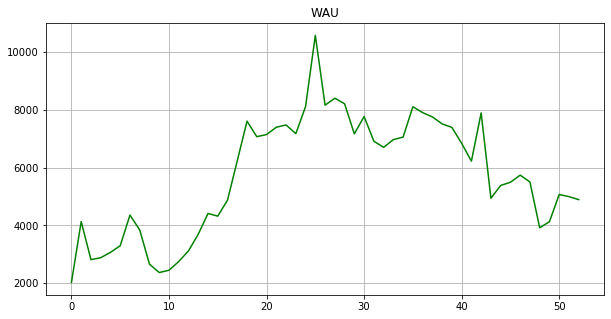

In [21]:
visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})\
                            .reset_index()['uid'].plot(grid=True, legend='',figsize=(10,5), color='g')
plt.title('WAU')
plt.show()

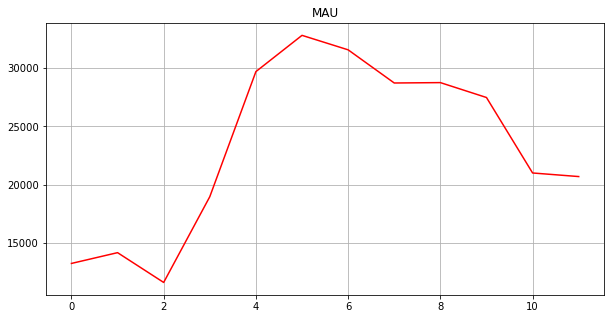

In [22]:
visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})\
                            .reset_index()['uid'].plot(grid=True, legend='',figsize=(10,5), color='r')
plt.title('MAU')
plt.show()

*б) Узнаем сколько происходит сессий в день и сколько длится одна сессия.*

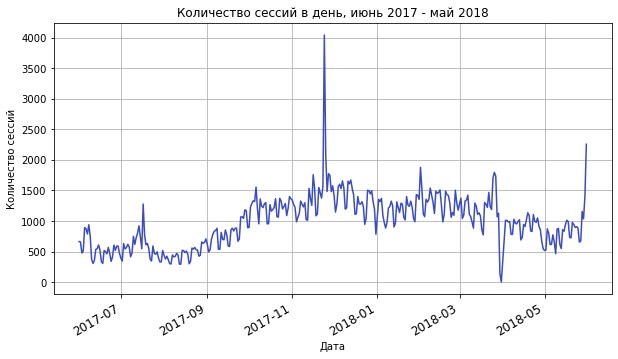

In [23]:
sessions_per_day = visits.groupby(['session_date']).agg({'uid': 'count'})
sessions_per_day.columns = ['n_sessions']
sessions_per_day.plot(legend='', figsize=(10,5), grid=True, colormap='coolwarm')
plt.title('Количество сессий в день, июнь 2017 - май 2018')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

Количетсво посещений сайта Яндекс.Афиша в день выросло с 500 до 1000 с конца июня 2017 года по конец мая 2018 года.

Однако видим, что в данных есть очень большие значения: во второй половине ноября количетсво обращений к Яндекс.Афише было рекордно большим, более 4000 сессий в день. Скорее всего это связано с тем, что пользователи заранее планировали как провести новогодние праздники.

В конце марта был день с 1 обращением к сервису. Возможно, были технические пробемы в работе и Яндекс.Афиша могла быть недоступна какое-то время.

В конце мая также наблюдается пик в обращениях, около 2000 сессий в день - вероятно, все строят планы на теплые летние дни.

Так как в данных есть "выбросы", для оценки среднего количества сессий в день будем использовать медианное значение - **в среднем происходит 1003 сессии в  день**.

In [24]:
sessions_per_day.describe()

,n_sessions
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


Изучим, сколько в среднем сессий приходится на одного пользователя в день. Это хороший показатель регулярности использования приложения. Найти эту метрику просто — разделим число сессий на количество пользователей за день.

In [25]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print(sessions_per_user)

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
...                  ...      ...                ...
2018-05-27           672      620           1.083871
2018-05-28          1156     1039           1.112608
2018-05-29          1035      948           1.091772
2018-05-30          1410     1289           1.093871
2018-05-31          2256     1997           1.129695

[364 rows x 3 columns]


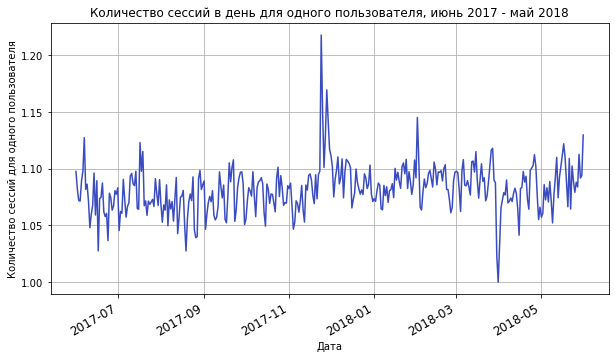

In [26]:
sessions_per_user.plot(y='sessions_per_user', legend='', figsize=(10,5), grid=True, colormap='coolwarm')
plt.title('Количество сессий в день для одного пользователя, июнь 2017 - май 2018')
plt.xlabel('Дата')
plt.ylabel('Количество сессий для одного пользователя')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

**В день один пользователь в среднем проводит в приложении чуть более 1 сессии**. Не сказать, что продукт используется регулярно. Однако это специфика услуги - пользователь составил свои планы и ему больше не нужно обращаться к Яндекс.Афише.  

Средняя продолжительность сессии или **ASL** (англ. average session length) показывает, сколько длится сессия пользователя в среднем.
Найдём ASL — посчитаем длину всех сессий и вычислим среднее.

In [27]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


Кажется, всё получилось. Однако взглянем на распределение.

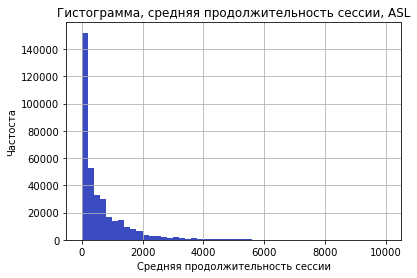

In [28]:
visits['session_duration_sec'].plot(kind='hist', bins=50, range=(0, 10000), colormap='coolwarm', grid=True)
plt.title('Гистограмма, средняя продолжительность сессии, ASL')
plt.ylabel('Частоста')
plt.xlabel('Средняя продолжительность сессии')
plt.show()

In [29]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Медиана равна 300. Рассчитаем моду (значение в выборке, которое встречается чаще всего). 

In [30]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

Для большинства пользователей **среднее время сессии, ASL, лежит в интервале от 60 до 300 секунд** или от 1 до 5 минут.  

*в) Узнаем, как часто люди возвращаются* 

Проведем когортный анализ и найдем Retention rate, коэффициент удержания, который показывает долю пользователей, который продолжают посещать сайт после первого посещения.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, первой сессии пользователя на Яндекс.Афише.
Эти данные запишем в объект Series first_session_date. Объединим его с исходным датафреймом visits.

In [31]:
first_session_date = visits.groupby(['uid'])['session_date'].min()
first_session_date.name = 'first_session_date'
visits = visits.join(first_session_date, on='uid')

В таблице появился столбец first_session_date с датами первой сессии пользователя. Следующим шагом выделим из столбцов first_session_date и session_date месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. [M] в типе datetime64 означает размерность временной метки, в этом случае — месяц.

In [32]:
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')

Когортой станет столбец first_session_month — месяц, в котором была первая сессия.

Отследим, как изменяется количество посещений внутри одной когорты. Это позволит понять, сколько людей продолжают посещать сайт в следующих месяцах после первой сессии. Построим сводную таблицу методом pivot_table(): в строках (index) будет когорта пользователей first_session_month; в столбцах (columns) — месяц текущей сессии session_month; значениями (values) станет количество уникальных пользователей uid, посещающих сайт; аргументе aggfunc укажем 'nunique'.

In [33]:
visits.pivot_table(index='first_session_month', columns='session_month', values='uid', aggfunc='nunique').fillna('')

session_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_session_month,,,,,,,,,,,,
2017-06-01,13259,1043,713,814,909,947,809,766,694,674,539,596.0
2017-07-01,,13140,737,674,738,765,633,596,601,510,376,361.0
2017-08-01,,,10181,783,640,639,510,448,370,402,284,265.0
2017-09-01,,,,16704,1428,1156,847,658,632,599,404,381.0
2017-10-01,,,,,25977,2042,1357,1012,890,837,555,529.0
2017-11-01,,,,,,27248,2133,1202,1054,919,638,594.0
2017-12-01,,,,,,,25268,1410,960,786,512,481.0
2018-01-01,,,,,,,,22624,1351,890,565,458.0
2018-02-01,,,,,,,,,22197,1267,565,446.0


Что можно сказать по этой таблице:
    
- После первого месяца количество посещений в когорте резко снижается.

- В первых двух когортах (2017-06-01 и 2017-07-01) число покупателей периодически начинает расти. В остальных когортах количество посещений уменьшается от месяца к месяцу.


Найдём **lifetime** когорты. Из месяца сессии session_month вычтем месяц когорты first_session_month.

In [34]:
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']

Получили столбец cohort_lifetime с типом timedelta (от англ. time delta — «дельта времени, перепад во времени»). Он хранит в себе разницу между двумя датами. 
Преобразуем этот тип в число месяцев, прошедших между датами. Для этого cohort_lifetime нужно разделить на константу np.timedelta64(1, 'M') — узнать, сколько величин длиной в 1 месяц содержится в cohort_lifetime. Константа np.timedelta64(1, 'M') есть только в Numpy, импортируем библиотеку.

In [35]:
visits['cohort_lifetime'] = visits['cohort_lifetime']/np.timedelta64(1, 'M') 

In [36]:
visits['cohort_lifetime']

0         0.000000
1         0.000000
2         0.000000
3         2.004148
4         0.000000
            ...   
359395    0.000000
359396    0.000000
359397    0.000000
359398    0.000000
359399    0.000000
Name: cohort_lifetime, Length: 359400, dtype: float64

Получили дробные числа. Это связано с тем, что константа np.timedelta64(1,'M') представляет собой среднюю длину месяца в году. В месяце бывает от 28 дней до 31, вот и числа вышли не целые. Округлим значения столбца cohort_lifetime методом round(), а затем приведём их к целочисленному типу методом astype('int').

In [37]:
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Получили целое число месяцев, обозначающее порядковый месяц совершения покупки относительно месяца первой покупки.
Когда все расчёты выполнены, оставим в обозначении когорты только год и месяц. Применим метод dt.strftime() (от англ. string format time) — он превращает объект Series с типом datetime в строку в формате даты. Оставим в данных о месяце первого заказа только год и месяц.

In [38]:
visits['first_session_month'] = visits['first_session_month'].dt.strftime('%Y-%m')

In [39]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0,2017-12-27,2017-12,0


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на каждый месяц.

In [40]:
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю. Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю.

In [41]:
initial_sessions_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_sessions_count

,first_session_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


Переименуем столбец uid в cohort_users методом rename() (англ. «переименовать»). Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое.

In [42]:
initial_sessions_count = initial_sessions_count.rename(columns={'uid':'cohort_users'})

Объединим данные по когортам с исходным количеством пользователей в когорте.

In [43]:
cohorts = cohorts.merge(initial_sessions_count, on='first_session_month')

Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте.

In [44]:
cohorts.head()

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


In [45]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту.

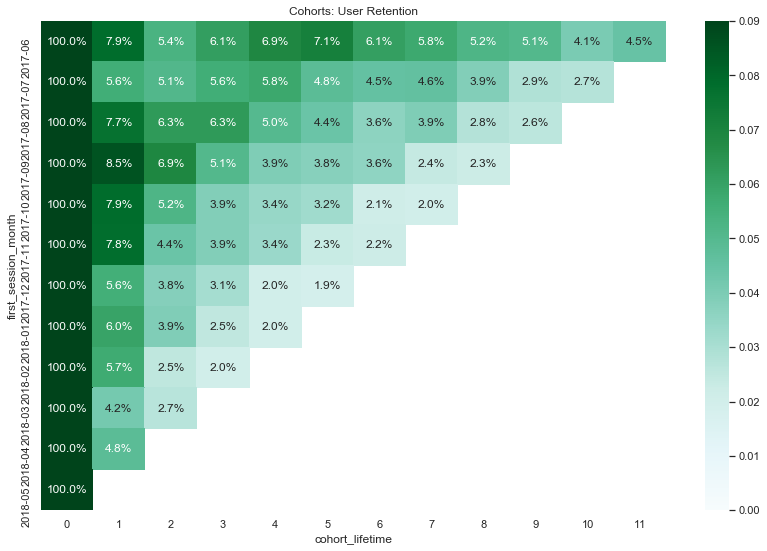

In [65]:
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmin=0.0, vmax=0.09, cmap='BuGn')
plt.title('Cohorts: User Retention')
plt.show()

Retention Rate критически убывает в первый месяц до менее 10% и далее снижается до менее 5% к 11 месяцу для всех когорт. Это значит, что пользователь раз воспользовавшись сервисом Яндекс.Афишы редко возвращается снова. Этот результат важно сообщить маркетологам, необходимо понять, как можно повысить Retention Rate.

### Выводы

- Изучили пользовательскую активность и установили, что в среднем каждый пользователь обращался к сервису Яндекс.Афиша чуть более раза в месяц. При этом один пользователь в среднем проводит чуть более 1 сессии в день.


- В среднем происходит 1003 сессии в день. Количетсво сессий в день с конца июня 2017 года по конец мая 2018 года выросло в среднем с 500 до 1000. Есть два пика и один спад. Пики возможно связаны с сезонностью, причина спада - скорее всего проблемы в работе сервиса.


- Для большинства пользователей среднее время сессии лежит в интервале от 1 до 5 минут.


- Retention Rate критически убывает в первый месяц до менее 10% и далее снижается до менее 5% к 11 месяцу для всех когорт. Это значит, что пользователь раз воспользовавшись сервисом Яндекс.Афишы редко возвращается снова.

*Низкие значениия skicky factors & Retention rate означают, что сервис Яндекс.Афиша непопулярен среди пользователей. Поэтому важно проверить эффективность маркетинговой компании и интерфейс приложения - оценить, насколько ценен и актуален контент, насыщен ли сервис полезными инстурментами и фичами, как обрабатываются отзывы клиентов, оправляются ли напоминания о запланированных/новых/интересных событиях. И также исселдовать как работают конкуренты.*

<a name="sales"></a>
### Построение отчётов и подсчёт метрик для продаж


*a) Когда люди начинают покупать?*

Найдем дату первой покупки и добавим ее к таблице orders.

In [66]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')

Далее добавим к таблице orders дату и время начала первой сессии.

In [67]:
orders = orders.join(visits.query('uid in @orders.uid').groupby('uid')['start_ts'].min(), on='uid')

In [68]:
orders.head()

,buy_ts,revenue,uid,first_order_date,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


Найдем сколько проходит времени в минутах после первой сессии, когда пользователь совершает первую покупку.

In [69]:
orders['time_to_buy'] = (orders['first_order_date'] - orders['start_ts']).dt.components['minutes']
orders['time_to_buy'].describe()

count    50415.000000
mean        17.871308
std         17.195414
min          0.000000
25%          3.000000
50%         12.000000
75%         30.000000
max         59.000000
Name: time_to_buy, dtype: float64

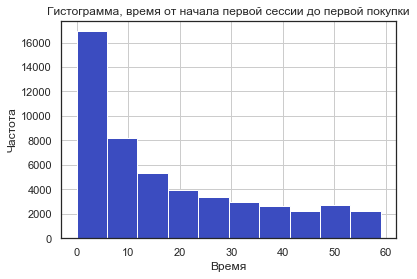

In [70]:
orders['time_to_buy'].plot(kind='hist', grid=True, colormap='coolwarm')
plt.title('Гистограмма, время от начала первой сессии до первой покупки')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.show()

- Обычно **пользователи совершают покупку в течение 15 минут** после начала сессии. 75% пользователей хватает 30 минут, чтобы совершить первую покупку.

*б) Сколько раз покупают за период?*

Проведем когортный анализ для дополненной таблицы orders.

In [71]:
orders.head()

,buy_ts,revenue,uid,first_order_date,start_ts,time_to_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27


In [72]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

Когортой станет столбец first_order_month — месяц, в котором была совершена первая покупка.

Отследим, как изменяется количество посещений внутри одной когорты. Это позволит понять, сколько людей продолжают делать покупки на сайте в следующих месяцах после первой покупки. Построим сводную таблицу методом pivot_table(): в строках (index) будет когорта пользователей first_order_month; в столбцах (columns) — месяц совершения покупки order_month; значениями (values) станет количество пользователей uid, совершающих покупки; аргументе aggfunc укажем 'count'.

In [73]:
orders.pivot_table(index='first_order_month', columns='order_month', values='uid', aggfunc='count').fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354,177,174,226,292,218,276,174,212,153,96,86,
2017-07-01,,2186,100,120,104,72,82,61,50,58,24,53,
2017-08-01,,,1533,108,100,81,85,62,49,78,46,46,
2017-09-01,,,,2933,219,161,164,67,109,108,56,61,
2017-10-01,,,,,4964,314,162,122,129,103,86,125,
2017-11-01,,,,,,4813,397,182,211,136,59,102,
2017-12-01,,,,,,,5052,270,202,179,86,105,
2018-01-01,,,,,,,,3783,224,159,64,78,
2018-02-01,,,,,,,,,4095,222,83,70,


In [74]:
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month'])/np.timedelta64(1, 'M') 
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

In [79]:
orders_pivot = orders.copy()
orders_pivot['first_order_month'] = orders_pivot['first_order_month'].dt.strftime('%Y-%m')

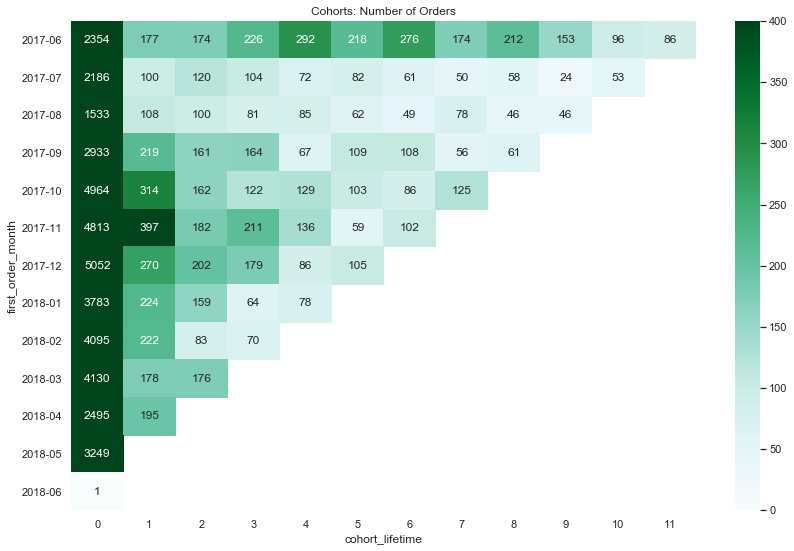

In [80]:
orders_pivot = orders_pivot.pivot_table(index='first_order_month', columns='cohort_lifetime', values='uid', aggfunc='count')

sns.set(style='white')
plt.figure(figsize=(14, 9))
plt.title('Cohorts: Number of Orders')
sns.heatmap(orders_pivot, annot=True, fmt='.0f',
            vmin = 0,
            vmax = 400,
            cmap = "BuGn");

Что можно сказать по этой таблице:

- После первого месяца количество покупок в когорте резко снижается.

- Максмимальное количество покупок (около 5000) было сделано в первый месяц с октября по декабрь 2017 года. Возможно, в это время люде реже берут отпуска, чаще остаются дома и поэтому у них чаще возникает потребность составить планы для проведения досуга в городе с использованием сервиса Яндекс.Афиша.

- В некоторых когортах число покупателей периодически начинает расти. 

- В январе для всех когорт количество покупок на сайте падает, возможно это связно с сезонностью.

*в) Какой средний чек?*

In [81]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

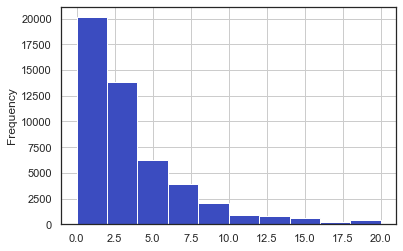

In [82]:
orders['revenue'].plot(kind='hist', grid=True, range=(0,20), colormap='coolwarm')
plt.show()

- **Средний чек - около 5 рублей.** 

Ещё одна задача когортного анализа: понять, как с течением времени изменяется средний чек — сумма покупок, делённая на число покупателей. Так узнаем, увеличивается или уменьшается средний чек покупателей, которые продолжают делать заказы в сервисе.

In [83]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})

Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid.

In [84]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени.

In [85]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean').round(2).fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72,16.1,17.71,35.76,23.51,22.21,31.01,25.03,19.3,27.23,25.68,9.8,
2017-07-01,,6.01,12.4,21.04,10.79,6.94,7.9,6.42,6.99,7.38,12.86,11.51,
2017-08-01,,,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,
2017-09-01,,,,5.64,22.19,13.45,138.67,19.88,26.1,27.44,16.96,11.04,
2017-10-01,,,,,5,11.29,6.75,7.41,7.07,7.26,6.57,7.48,
2017-11-01,,,,,,5.15,7.34,6.79,12.51,7.46,4.58,7.56,
2017-12-01,,,,,,,4.74,7.82,39.37,48.14,27.43,23.52,
2018-01-01,,,,,,,,4.14,8.72,12.37,11.2,4.7,
2018-02-01,,,,,,,,,4.16,8.61,4.94,6.94,


Видим, что со времнем **средний чек увеличивается**.

Найдём lifetime когорты. Из месяца совершения заказа order_month вычтем месяц когорты first_order_month.

In [86]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')).round().astype('int')
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты.

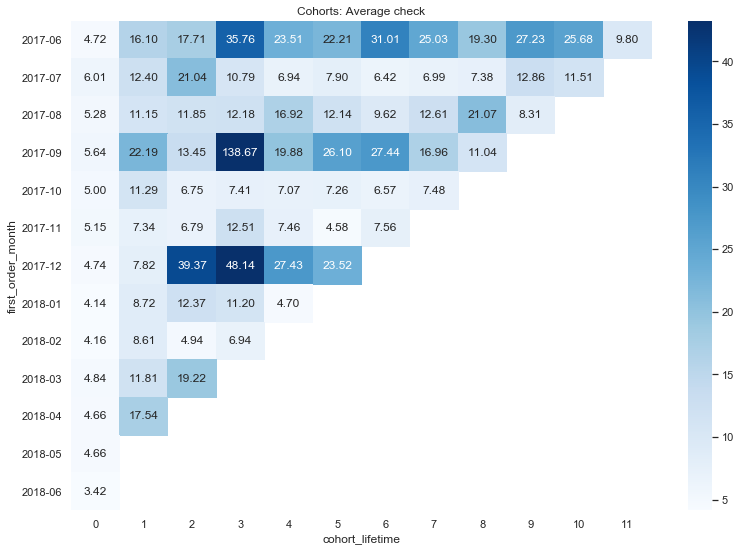

In [89]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean').round(2)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average check')
sns.heatmap(revenue_per_user_pivot, cmap='Blues', robust=True, annot=True, fmt='.2f');

Видно, что во всех когортах **средний чек пользователей возрастает на следующий месяц после месяца первой покупки**. 

Почти во всех когортах есть периоды роста стоимости среднего чека и периоды спада стоимости среднего чека.

*г) Сколько денег приносят? (LTV)*

In [90]:
orders.head()

,buy_ts,revenue,uid,first_order_date,start_ts,time_to_buy,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27,2017-06-01,2017-06-01,0


In [91]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**LTV** удобно считать по когортам. Вспомним, что для этого нужно: найти дату первой покупки каждого покупателя; вычислить число новых покупателей за каждую дату; добавить дату первой покупки в таблицу с заказами; сгруппировать таблицу и посчитать выручку. Данные почти за год. Удобнее всего сформировать месячные когорты.

In [92]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя.

In [93]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

Посчитаем количество новых покупателей (n_buyers) за каждый месяц.

In [94]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами.

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index().

In [95]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Строка таблицы cohorts показывает, какую выручку принесла когорта. Например, строка 0 сообщает, что покупатели, сделавшие свой первый заказ в июне 2017 года, в этом же месяце принесли суммарно 9557 рублей выручки.

С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц.

In [96]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

Ранее в таблице появился столбец с новыми покупателями — n_buyers. В первых 5 строках его значение не изменяется — ведь это продажи одной и той же когорты.
До расчёта LTV осталось 2 шага. Во-первых, LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Во-вторых, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [97]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы.

In [98]:
report['ltv'] = report['gp'] / report['n_buyers']

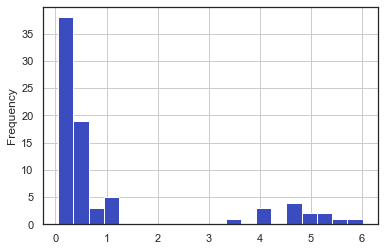

In [99]:
report['ltv'].plot(kind='hist', grid=True, bins=20, colormap='coolwarm')
plt.show()

In [100]:
report['ltv'].describe()

count    79.000000
mean      1.149639
std       1.718082
min       0.053879
25%       0.185992
50%       0.391277
75%       0.830299
max       6.010218
Name: ltv, dtype: float64

In [101]:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

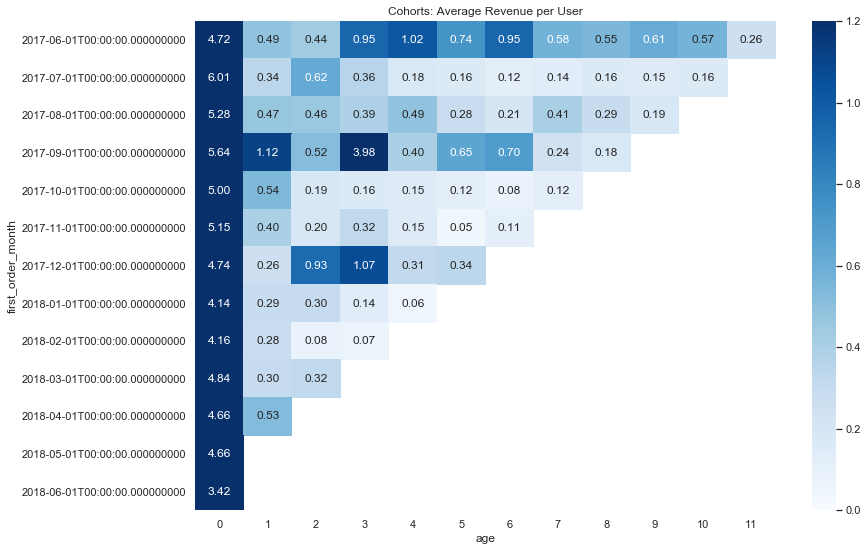

In [102]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average Revenue per User')
sns.heatmap(output, cmap="Blues", vmin=0, vmax=1.2, annot=True, fmt='.2f');

ARPU в первый месяц самый большой для всех когорт.

In [103]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


Рассмотрим когорты, которые прожили 6 и более месяцев. И для них рассмторим первые шесть месяцев. Предположим 6 месяцев - это "время жизни" когорты.

In [104]:
long_living_cohorts = report.query('age >=5')['first_order_month'].unique().tolist()
six_months_cohorts = report.query('first_order_month in @long_living_cohorts and age <= 5')

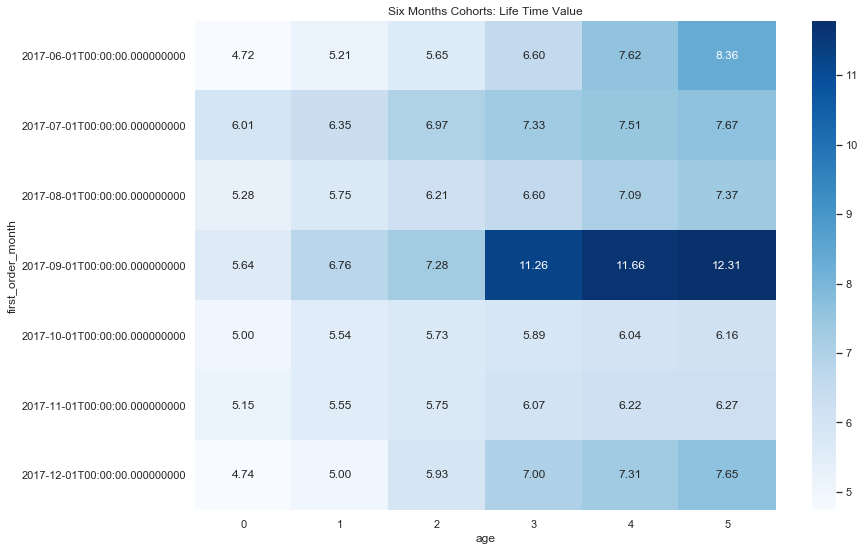

In [106]:
output = six_months_cohorts.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Six Months Cohorts: Life Time Value')
sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', robust=True, cmap='Blues');

In [107]:
six_months_cohorts.groupby('first_order_month')['ltv'].sum().mean() # mean LTV

7.969052630207335

Среди когорт, которые прожили 6 и более месяцев, **средний LTV на пользователя равен 8 рублям**.

Таким образом, затраты на привлечение пользователя не должны превышать 8 рублей, чтобы бизнес оставался рентабельным.

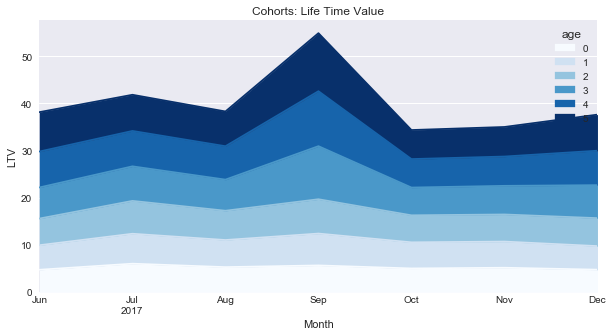

In [112]:
plt.style.use('seaborn')
output.cumsum(axis=1).round(2).plot.area(figsize=(10,5), colormap='Blues')
plt.grid(True)
plt.ylabel('LTV')
plt.xlabel('Month')
plt.title('Cohorts: Life Time Value')
plt.show()

### Вывод

В данном болке узнали:

- Обычно **пользователи совершают покупку в течение 15 минут** после начала сессии. 75% пользователей хватает 30 минут, чтобы совершить первую покупку.

- После первого месяца количество покупок в когорте резко снижается. Максмимальное количество покупок (около 5000) было сделано с октября по декабрь 2017 года. Возможно, в это время люде реже берут отпуска, чаще остаются дома и поэтому у них чаще возникает потребность составить планы для проведения досуга в городе с использованием сервиса Яндекс.Афиша. В некоторых когортах число покупателей периодически начинает расти. В январе для всех когорт количество покупок на сайте падает, возможно это связно с сезонностью.

- **Средний чек составляет 5 рублей.**

- Среди когорт, которые прожили 6 и более месяцев, **средний LTV на пользователя равен 8 рублям**.


*Затраты на привлечение пользователя не должны превышать 8 рублей, чтобы бизнес оставался рентабельным*.

<a name="marketing"></a>
### Построение отчётов и подсчёт метрик для маркетинга


*а) Сколько денег потратили? Всего / на каждый источник / по времени*

In [113]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [114]:
costs['costs'].sum()

329131.62

Всего **на макретинг потратили около 330 000 рублей**.

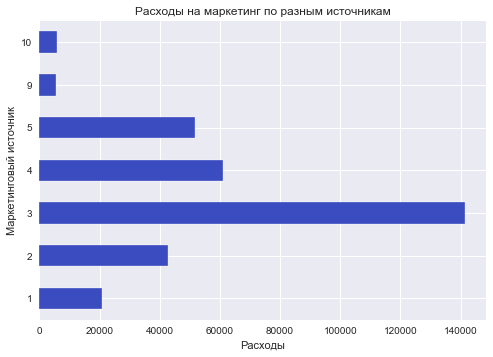

In [115]:
costs.groupby('source_id')['costs'].sum().plot(kind='barh', grid=True, colormap='coolwarm')
plt.title('Расходы на маркетинг по разным источникам')
plt.xlabel('Расходы')
plt.ylabel('Маркетинговый источник')
plt.show()

- Самый большие раходы (более 140 000 рублей) на источник №3.

- От 40 до 60 тысяч потратили на источники №4, №5 и №2.

- Около 20 тысыч потратили на источник №1; на источники №9 и №10 было потрачено около 5 тыс рублей.

In [116]:
costs_per_month = costs.groupby('month')['costs'].sum().reset_index()
costs_per_month['month'] = costs_per_month['month'].dt.strftime('%Y-%m')

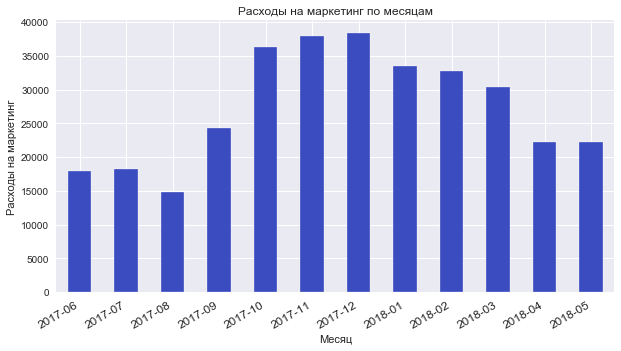

In [117]:
costs_per_month.plot(kind='bar', x='month', grid=True, colormap='coolwarm', figsize=(10,5), legend='')
plt.title('Расходы на маркетинг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы на маркетинг')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

Больше всего (30-40 тыс рублей) было потрачен на маркетинг с октября 2017 год по март 2018 года. Скорее всего в это время люди реже берут отпуска и чаще нуждаются в сервисе, чтобы составить свои планы.

*б) Сколько стоило привлечение одного покупателя из каждого источника?*

**CAC** (от англ. customer acquisition cost) — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании.

Найдем дату и время первого визита для каждого покупателя. Далее найдем сколько было покупателей, привлеченных из разных источников, по месяцам.

In [118]:
first_visit_by_buyer = visits.sort_values(by='start_ts')\
                             .query('uid in @orders.uid')\
                             .groupby('uid').agg({'start_ts':'first', 'source_id':'first'})\
                             .reset_index()

first_visit_by_buyer['month'] = first_visit_by_buyer['start_ts'].astype('datetime64[M]')
first_visit_by_source_month = first_visit_by_buyer.groupby(['source_id', 'month'])['uid'].count().to_frame().reset_index()
first_visit_by_source_month.columns = ['source_id', 'month', 'n_buyers']
first_visit_by_source_month.head()

,source_id,month,n_buyers
0,1,2017-06-01,240
1,1,2017-07-01,184
2,1,2017-08-01,126
3,1,2017-09-01,248
4,1,2017-10-01,350


Найдем расходы на маркетинг по каждому источнику по месяцам.

In [119]:
monthly_costs = costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
monthly_costs.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Добавим данные о расходах в отчёт и посчитаем CAC.

In [120]:
costs_per_user = pd.merge(first_visit_by_source_month, monthly_costs, on=['month', 'source_id'])
costs_per_user['cac'] = costs_per_user['costs'] / costs_per_user['n_buyers']
costs_per_user.head()

,source_id,month,n_buyers,costs,cac
0,1,2017-06-01,240,1125.61,4.690042
1,1,2017-07-01,184,1072.88,5.830870
2,1,2017-08-01,126,951.81,7.554048
3,1,2017-09-01,248,1502.01,6.056492
4,1,2017-10-01,350,2315.75,6.616429


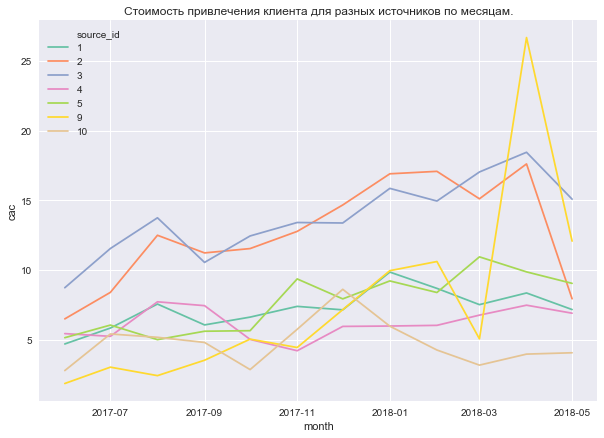

In [121]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(x='month', y='cac', hue='source_id', data=costs_per_user, palette=sns.color_palette("Set2", costs_per_user['source_id'].nunique()))
plt.title('Стоимость привлечения клиента для разных источников по месяцам.')
plt.grid(True)
plt.show()

Со временем стоимость привлечения клиента почти по всем источникам увеличивается.

In [122]:
cac_by_source = costs_per_user.groupby('source_id').agg({'n_buyers': 'sum', 'costs': 'sum'}).reset_index()
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source['n_buyers']

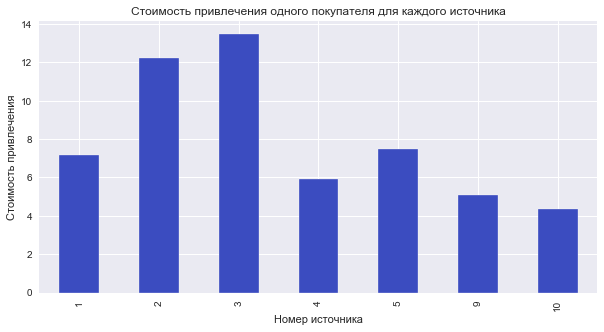

In [123]:
cac_by_source[['source_id', 'cac']].plot(kind='bar', x='source_id', grid=True, colormap='coolwarm', legend='', figsize=(10,5))
plt.title('Стоимость привлечения одного покупателя для каждого источника')
plt.xlabel('Номер источника')
plt.ylabel('Стоимость привлечения')
plt.show()

Дороже всего обходятся клиенты, привлеченные из источника №3 и №2, стоимость привлечения равна 14 и 12 рублей соответтсвенно.

Стоимость привлечения клиентов из истчоников №1 и №5 7-8 рублей.

CAC для источтников №4, №9 и № 10 4-6 рублей.

*в) На сколько окупились расходы? (ROI)*

Рассчитаем ROMI: поделим LTV на CAC. Чтобы посчитать накопительный ROMI, вызовем метод cumsum() (от англ. cumulative sum, «накапливаемая сумма»). Он последовательно складывает элементы множества. 

In [124]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()

In [125]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [126]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


Июньская когорта окупилась на 7 месяц (ROMI = 1.05). Сентябрьская когорта окупилась на 4 месяц (ROMI = 1.19).

Остальные когорты пока не окупились.

На практике считают среднюю когорту — усредняют ROMI или LTV всех когорт за каждый месяц их жизни. Например, узнаем, как быстро в среднем когорты окупаются. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0).

In [127]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорты окупаются к концу 9 месяца. Это достаточно долгий срок. Скорее всего нужно подкорректировать маркетинговую стратегию.

### Выводы

В данной секции изучили раходы на маркетинг и узнали:
    
- всего на макретинг потратили около 330 000 рублей; самый большие раходы (более 140 000 рублей) на источник №3. От 40 до 60 тысяч потратили на источники №4, №5 и №2; около 20 тысыч потратили на источник №1; на источники №9 и №10 было потрачено около 5 тыс рублей.


- больше всего (30-40 тыс рублей) было потрачен на маркетинг с октября 2017 год по март 2018 года. Скорее всего в это время люди реже берут отпуска и чаще нуждаются в сервисе, чтобы составить свои планы;


- Дороже всего обходятся клиенты, привлеченные из источника №3 и №2, стоимость привлечения равна 14 и 12 рублей соответтсвенно. Стоимость привлечения клиентов из истчоников №1 и №5 7-8 рублей. CAC для источтников №4, №9 и № 10 4-6 рублей.


- Июньская когорта окупилась на 7 месяц (ROMI = 1.05). Сентябрьская когорта окупилась на 4 месяц (ROMI = 1.19).

*В среднем когорты окупаются к концу 9 месяца. Это достаточно долгий срок. Скорее всего нужно подкорректировать маркетинговую стратегию.*

<a name="summary"></a>
### Общие выводы

Посмотрим на разницу LTV и CAC:

In [128]:
report_new['cac'].sum() - report_new['ltv'].sum()

639.5510839299665

*Данный результат говорит о том, что мы тратим на привлечение клиента больше денег, чем зарабатываем с каждого клиента.*

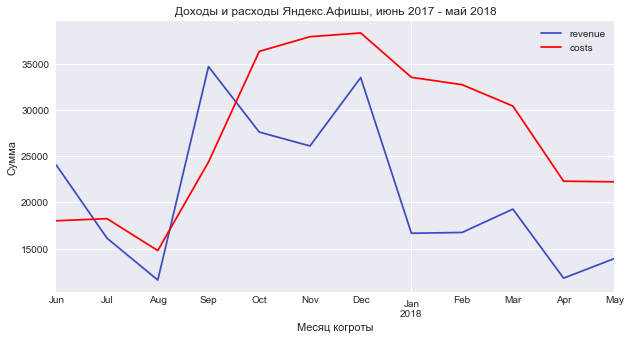

In [129]:
orders.query('first_order_month < "2018-06-01"').groupby('first_order_month')['revenue'].sum().plot(legend='revenue', colormap='coolwarm')
costs.groupby('month')['costs'].sum().plot(legend='costs', figsize=(10,5), color='red')
plt.grid(True)
plt.title('Доходы и расходы Яндекс.Афишы, июнь 2017 - май 2018')
plt.xlabel('Месяц когроты')
plt.ylabel('Сумма')
plt.show()


В ходе исследования увидели, как люди пользуются продуктом.

- В среднем в день происходит 1003 обращений к сайту Яндекс.Афиша. Есть два пика и один спад в дневных обращениях: пики возможно связаны с сезонностью, причина спада - скорее всего проблемы в работе сервиса. Однако в среднем каждый пользователь обращался к сервису Яндекс.Афиша чуть более раза в месяц. При этом один пользователь в среднем проводит чуть более 1 сессии в день. Данный результат соответсвует **очень низкому Retention Rate**. Он критически убывает в первый месяц до менее 10% и далее снижается до менее 5% к 11 месяцу для всех когорт. Это значит, что **пользователь раз воспользовавшись сервисом Яндекс.Афишы редко возвращается снова**.


- Для большинства пользователей **среднее время сессии лежит в интервале от 1 до 5 минут**.

Поняли, когда они начинают покупать.

- Обычно пользователи **совершают покупку в течение 15 минут** после начала сессии. 75% пользователей хватает 30 минут, чтобы совершить первую покупку.

Посчитали, сколько денег приносит каждый клиент.

- **Средний чек составляет 5 рублей.**

- Среди когорт, которые прожили "жизненный цикл" 6 и более месяцев, **средний LTV на пользователя равен 8 рублям**.

- После первого месяца количество покупок в когорте резко снижается.


Узнали, когда клиент окупается.

- Из всех когорт окупились только две из них, остальные когорты пока не окупились. **В среднем когорты окупаются к концу 9 месяца**. Это достаточно долгий срок. Скорее всего *нужно подкорректировать маркетинговую стратегию*.

Рекомендации отделу маркетинга.

- *Низкие значениия skicky factors & Retention rate означают, что сервис Яндекс.Афиша непопулярен среди пользователей. Поэтому важно проверить эффективность маркетинговой компании и интерфейс приложения - оценить, насколько ценен и актуален контент, насыщен ли сервис полезными инстурментами и фичами, как обрабатываются отзывы клиентов, оправляются ли напоминания о запланированных/новых/интересных событиях. И полезно исследовать как работают конкуренты.*


- *Важно пересмотеть марктеинговую стратегию, чтобы увеличить Retention Rate. Очевидно, что текущий фаворит среди маркетинговых источников неэффектиный или есть технические проблемы. Чтобы исключить технические проблемы, необходимо посторить маркетинговую воронку и посмотреть на конверсии. Если все в порядке, попробовать инвестировать в другие маркетинговые источники. Продумать, как можно удерживать клиентов - например, ввести программу лояльности для постоянных пользователей и/или предалагать скидки на билеты*.


- *Больше всего (более 140 000 рублей) было потрачено на источник №3, тогда как стоимость привлечения одного покупателя, CAC, из источника №3 самая высокая 14 рублей, тогда как прибыль с одного покупателя, LTV, равна 8 рублей. То есть затраты на привлечение превышают доходы от одного пользователя. Поэтому можно попробовать перенаправить финансирование на другие источнки (№1, 4, 5, 9, 10), для которых LTV превышает CAC, чтобы бизнес окупался.*
